# Imports necessários

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine
import datetime as dt

# Conexão com o DB local

In [2]:
load_dotenv()

driver = os.environ["Driver"]
server = os.environ["Server"]
database = os.environ["Database"]

In [3]:
dados_conexao = (
    f"Driver={driver};"
    f"Server={server};"
    f"Database={database};"
)

In [4]:
def query_banco(query, dados_conexao):
    engine = create_engine(f'mssql+pyodbc:///?odbc_connect={dados_conexao}')
    return pd.read_sql(query, engine)

# Import dos dados

In [5]:
df_despesas = query_banco("SELECT * FROM Fato_Despesa", dados_conexao)
df_despesas.drop(columns=['id','uid_fato_despesa','credor_despesa', 'fonte_recurso', 'orgao_interno', 'orgao_vinculado', 'cod_elemento', 'cod_subelemento', 'cod_funcao', 'cod_subfuncao', 'cod_natureza'], inplace=True)
df_despesas.head()

,data_fato,valor_fixado,valor_empenhado,valor_liquidado,valor_pago,saldo
0,2013-12-31,2911694.0,5120.0,5120.0,0.0,5120.0
1,2013-12-31,107000.0,6950.0,6950.0,0.0,6950.0
2,2013-12-31,107000.0,800.0,800.0,0.0,800.0
3,2013-12-31,107000.0,400.0,400.0,0.0,400.0
4,2013-12-31,107000.0,600.0,600.0,0.0,600.0


In [6]:
df_populacao = query_banco("SELECT * FROM Dim_Populacao", dados_conexao)
df_populacao.drop(columns=['id'], inplace=True)
df_populacao

,ano,populacao,variacao_anual,porcentagem_variacao_anual,aceleracao_variacao_anual,porcentagem_aceleracao_variacao_anual
0,1991,51273,0,0,0,0
1,1992,51530,257,"0,5",0,0
2,1993,51965,435,"0,84",178,"69,26"
3,1994,52279,314,"0,6",-121,"-27,82"
4,1995,52586,307,"0,59",-7,"-2,23"
5,1996,51396,-1190,"-2,26",-1497,"-487,62"
6,1997,51575,179,"0,35",1369,"-115,04"
7,1998,51726,151,"0,29",-28,"-15,64"
8,1999,51878,152,"0,29",1,"0,66"
9,2000,54715,2837,"5,47",2685,"1766,45"


In [7]:
df_idhm = query_banco("SELECT ano, ideb_5ano, ideb_9ano, idhm FROM Dim_IDHM", dados_conexao)
df_idhm

,ano,ideb_5ano,ideb_9ano,idhm
0,2013,"4,1","2,8","0,679"
1,2014,"4,1","2,8","0,679"
2,2015,"4,4",3,"0,679"
3,2016,"4,4",3,"0,679"
4,2017,"4,8","3,5","0,679"
5,2018,"4,8","3,5","0,679"
6,2019,"5,3","4,1","0,679"
7,2020,"5,3","4,1","0,679"
8,2021,"5,1","4,9","0,679"


In [8]:
df_saude = query_banco("SELECT ano, pct_desp_recp_saude_mun, desp_tot_saude_pc_mun,desp_recp_saude_pc_mun, desp_tot_saude_pc_mun_def, desp_recp_saude_pc_mun_def FROM Dim_Saude", dados_conexao)
df_saude

,ano,pct_desp_recp_saude_mun,desp_tot_saude_pc_mun,desp_recp_saude_pc_mun,desp_tot_saude_pc_mun_def,desp_recp_saude_pc_mun_def
0,2013,"16,56","464,3","114,1","744,7674653","183,0238376"
1,2014,"23,4","448,73","186,19","676,4489043","280,676624"
2,2015,"22,48","468,65","190,19","638,3468516","259,057266"
3,2016,"21,23","439,37","202,37","563,0595289","259,3403211"
4,2017,"18,6","468,37","178,28","583,0388706","221,9274716"
5,2018,"18,26","705,23","190,43","846,1933549","228,4936837"
6,2019,"16,13","559,08","187,04","643,1360678","215,1609253"
7,2020,"16,23","668,07","187,35","735,277842","206,19741"
8,2021,"19,02","790,59","272,68","790,59","272,68"


# Feature engineering

## Inserindo colunas que tratam do tempo

In [9]:
def cria_colunas_tempo(df, coluna_data):
    df[coluna_data] = pd.to_datetime(df[coluna_data])
    df['ano_mes'] = df[coluna_data].dt.strftime('%Y-%m')
    df['ano'] = df[coluna_data].dt.strftime('%Y')
    return df

def transforma_data_em_ordinal(df, coluna_referencia):
    df['ano_mes_ordinal'] = pd.to_datetime(df[coluna_referencia])
    df['ano_mes_ordinal'] = df['ano_mes_ordinal'].map(dt.datetime.toordinal)
    return df

def transforma_coluna_em_datetime(df, coluna):
    df[coluna] = pd.to_datetime(df[coluna], format='%Y')
    return df

## Remoção de outliers

In [10]:
# Aplicação de IQR - Interquartile Range
def remove_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    print(f'Q1: {Q1}')
    Q3 = df[coluna].quantile(0.75)
    print(f'Q3: {Q3}')
    IQR = Q3 - Q1
    print(f'IQR: {IQR}')
    print(f'Limite inferior: {Q1 - 1.5 * IQR}')
    print(f'Limite superior: {Q3 + 1.5 * IQR}')
    df = df[(df[coluna] >= Q1 - 1.5*IQR) & (df[coluna] <= Q3 + 1.5*IQR)]
    print(f'Quantidade de registros sem outliers: {df.shape[0]}')
    return df

# Gráfico de dispersão
def box_plot(df, coluna_referencia, coluna_visao):
    print(f'Quantidade de registros: {df.shape[0]}')
    df.boxplot(by=coluna_referencia, column=coluna_visao, figsize=(10,6))

In [11]:
def plot_series_data(df, coluna_referencia):
    train_size = int(len(df) * 0.8)
    train_dataset, test_dataset = df.iloc[:train_size], df.iloc[train_size:]
    plt.figure(figsize=(20,10))
    plt.plot(train_dataset[coluna_referencia])
    plt.plot(test_dataset[coluna_referencia])
    plt.xlabel('Período')
    plt.ylabel('Valor Arrecadado')
    plt.legend(['Treino', 'Teste'], loc='upper left')
    plt.show()
    plt.savefig('../../src/static/images/dados_treinamento.png')
    print('Dimension of train data: ', train_dataset.shape)
    print('Dimension of test data: ', test_dataset.shape)

## Conversão de tipos de dados nas colunas

In [12]:
def converte_tipo_dados(df, colunas, tipo):
    for coluna in colunas:
        df[coluna] = df[coluna].astype(tipo)
    return df

# Análise exploratória dos dados

## Despesas

In [13]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86841 entries, 0 to 86840
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data_fato        86841 non-null  datetime64[ns]
 1   valor_fixado     86841 non-null  float64       
 2   valor_empenhado  86841 non-null  float64       
 3   valor_liquidado  86841 non-null  float64       
 4   valor_pago       86841 non-null  float64       
 5   saldo            86841 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 4.0 MB


In [14]:
df_despesas.describe().round(2)

,data_fato,valor_fixado,valor_empenhado,valor_liquidado,valor_pago,saldo
count,86841,86841.00,86841.00,86841.00,86841.00,86841.00
mean,2018-03-12 20:45:52.451031040,336082.00,14906.00,14448.91,13163.63,1500.68
min,2013-01-02 00:00:00,0.00,0.00,0.00,0.00,-396163.17
25%,2015-08-20 00:00:00,1000.00,250.00,240.00,150.00,0.00
50%,2018-03-26 00:00:00,50000.00,990.86,880.00,613.00,0.00
75%,2020-10-15 00:00:00,200000.00,5244.05,4995.00,3800.00,0.00
max,2022-12-30 00:00:00,14400000.00,2795000.00,2795000.00,2795000.00,1639155.73
std,NaN,1010914.22,71460.78,70443.38,67964.15,19966.49


In [15]:
df_despesas_com_outliers = cria_colunas_tempo(df_despesas,'data_fato')
df_despesas_com_outliers.head()

,data_fato,valor_fixado,valor_empenhado,valor_liquidado,valor_pago,saldo,ano_mes,ano
0,2013-12-31,2911694.0,5120.0,5120.0,0.0,5120.0,2013-12,2013
1,2013-12-31,107000.0,6950.0,6950.0,0.0,6950.0,2013-12,2013
2,2013-12-31,107000.0,800.0,800.0,0.0,800.0,2013-12,2013
3,2013-12-31,107000.0,400.0,400.0,0.0,400.0,2013-12,2013
4,2013-12-31,107000.0,600.0,600.0,0.0,600.0,2013-12,2013


Quantidade de registros: 86841


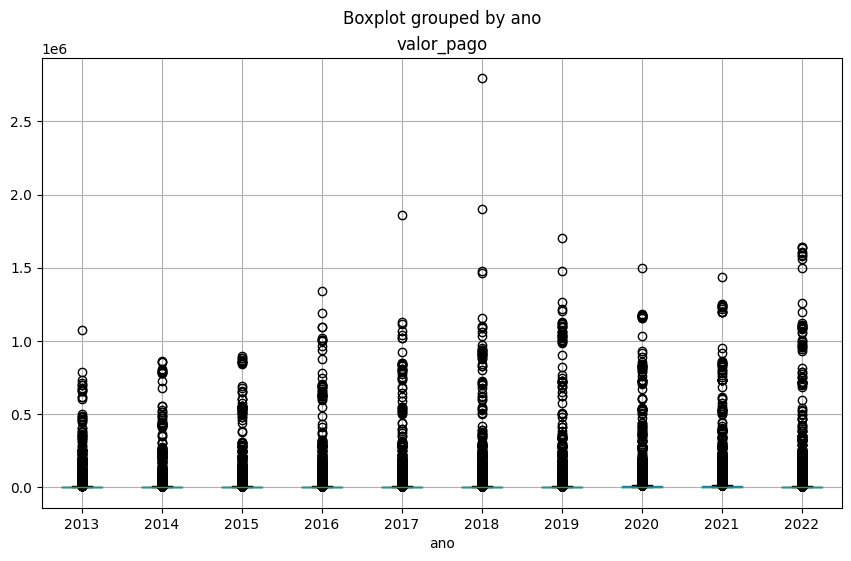

In [16]:
box_plot(df_despesas_com_outliers, 'ano', 'valor_pago')

In [17]:
df_despesas_sem_outliers = remove_outliers(df_despesas_com_outliers, 'valor_pago')

Q1: 150.0
Q3: 3800.0
IQR: 3650.0
Limite inferior: -5325.0
Limite superior: 9275.0
Quantidade de registros sem outliers: 72498


Quantidade de registros: 72498


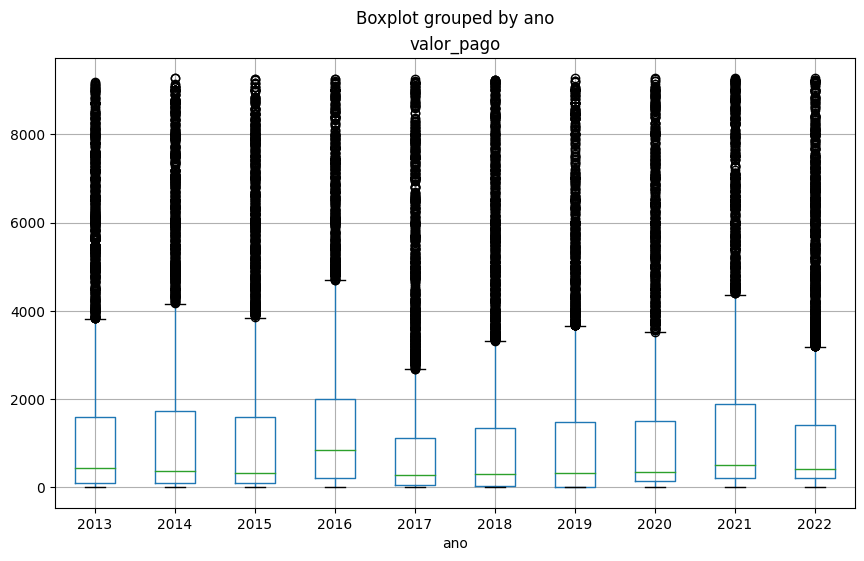

In [18]:
box_plot(df_despesas_sem_outliers, 'ano', 'valor_pago')

## População

In [19]:
df_populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   ano                                    32 non-null     int64 
 1   populacao                              32 non-null     int64 
 2   variacao_anual                         32 non-null     object
 3   porcentagem_variacao_anual             32 non-null     object
 4   aceleracao_variacao_anual              32 non-null     object
 5   porcentagem_aceleracao_variacao_anual  32 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.6+ KB


In [20]:
df_populacao.describe().round(0)

,ano,populacao
count,32.0,32.0
mean,2006.0,57024.0
std,9.0,4073.0
min,1991.0,51273.0
25%,1999.0,52509.0
50%,2006.0,57065.0
75%,2014.0,61130.0
max,2022.0,63239.0


In [21]:
df_populacao_dados_copy = df_populacao.copy()
df_populacao_dados_convertidos = df_populacao_dados_copy
df_populacao_dados_convertidos['ano'] = df_populacao_dados_convertidos['ano'].astype(object)
df_populacao_dados_convertidos = transforma_coluna_em_datetime(df_populacao, 'ano')
df_populacao_dados_convertidos = cria_colunas_tempo(df_populacao, 'ano')
df_populacao_dados_convertidos['porcentagem_variacao_anual'] = df_populacao_dados_convertidos['porcentagem_variacao_anual'].str.replace(',','.').astype(float)
df_populacao_dados_convertidos['porcentagem_aceleracao_variacao_anual'] = df_populacao_dados_convertidos['porcentagem_aceleracao_variacao_anual'].str.replace(',','.').astype(float)

In [22]:
df_populacao_dados_convertidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ano                                    32 non-null     object 
 1   populacao                              32 non-null     int64  
 2   variacao_anual                         32 non-null     object 
 3   porcentagem_variacao_anual             32 non-null     float64
 4   aceleracao_variacao_anual              32 non-null     object 
 5   porcentagem_aceleracao_variacao_anual  32 non-null     float64
 6   ano_mes                                32 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.9+ KB


In [23]:
df_populacao_dados_convertidos = converte_tipo_dados(df_populacao_dados_convertidos, ['variacao_anual', 'aceleracao_variacao_anual'], 'int64')
df_populacao_dados_convertidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ano                                    32 non-null     object 
 1   populacao                              32 non-null     int64  
 2   variacao_anual                         32 non-null     int64  
 3   porcentagem_variacao_anual             32 non-null     float64
 4   aceleracao_variacao_anual              32 non-null     int64  
 5   porcentagem_aceleracao_variacao_anual  32 non-null     float64
 6   ano_mes                                32 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.9+ KB


In [24]:
df_populacao_dados_convertidos

,ano,populacao,variacao_anual,porcentagem_variacao_anual,aceleracao_variacao_anual,porcentagem_aceleracao_variacao_anual,ano_mes
0,1991,51273,0,0.00,0,0.00,1991-01
1,1992,51530,257,0.50,0,0.00,1992-01
2,1993,51965,435,0.84,178,69.26,1993-01
3,1994,52279,314,0.60,-121,-27.82,1994-01
4,1995,52586,307,0.59,-7,-2.23,1995-01
5,1996,51396,-1190,-2.26,-1497,-487.62,1996-01
6,1997,51575,179,0.35,1369,-115.04,1997-01
7,1998,51726,151,0.29,-28,-15.64,1998-01
8,1999,51878,152,0.29,1,0.66,1999-01
9,2000,54715,2837,5.47,2685,1766.45,2000-01


## IDHM

In [25]:
df_idhm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ano        9 non-null      int64 
 1   ideb_5ano  9 non-null      object
 2   ideb_9ano  9 non-null      object
 3   idhm       9 non-null      object
dtypes: int64(1), object(3)
memory usage: 420.0+ bytes


In [26]:
transforma_coluna_em_datetime(df_idhm, 'ano')

,ano,ideb_5ano,ideb_9ano,idhm
0,2013-01-01,"4,1","2,8","0,679"
1,2014-01-01,"4,1","2,8","0,679"
2,2015-01-01,"4,4",3,"0,679"
3,2016-01-01,"4,4",3,"0,679"
4,2017-01-01,"4,8","3,5","0,679"
5,2018-01-01,"4,8","3,5","0,679"
6,2019-01-01,"5,3","4,1","0,679"
7,2020-01-01,"5,3","4,1","0,679"
8,2021-01-01,"5,1","4,9","0,679"


In [27]:
df_idhm_dados_copy = df_idhm.copy()
df_idhm_dados_convertidos = df_idhm_dados_copy
df_idhm_dados_convertidos['ideb_5ano'] = df_idhm['ideb_5ano'].str.replace(',','.').astype(float)
df_idhm_dados_convertidos['ideb_9ano'] = df_idhm['ideb_9ano'].str.replace(',','.').astype(float)
df_idhm_dados_convertidos['idhm'] = df_idhm['idhm'].str.replace(',','.').astype(float)

In [28]:
# Estimar valores para o ano de 2022 usando a média das variações anuais
variacao_anual_ideb_5ano = df_idhm_dados_convertidos.groupby('ano')['ideb_5ano'].last().pct_change().mean()
variacao_anual_ideb_9ano = df_idhm_dados_convertidos.groupby('ano')['ideb_9ano'].last().pct_change().mean()
valor_2022_ideb_5ano = df_idhm_dados_convertidos['ideb_5ano'].values[-1]
valor_2022_ideb_9ano = df_idhm_dados_convertidos['ideb_9ano'].values[-1]
valor_2022_ideb_5ano_estimado = valor_2022_ideb_5ano * (1 + variacao_anual_ideb_5ano)
valor_2022_ideb_9ano = valor_2022_ideb_9ano * (1 + variacao_anual_ideb_9ano)

In [29]:
# Criar um novo DataFrame com as linhas para 2021 e 2022
novas_linhas = pd.DataFrame({'ano': [2022], 'ideb_5ano': [valor_2022_ideb_5ano_estimado], 'ideb_9ano': [valor_2022_ideb_9ano], 'idhm': [df_idhm_dados_convertidos['idhm'].values[-1]]})
novas_linhas = transforma_coluna_em_datetime(novas_linhas, 'ano')

# Concatenar as novas linhas ao DataFrame original
df_idhm_convertido = pd.concat([df_idhm_dados_convertidos, novas_linhas], ignore_index=True)
df_idhm_convertido

,ano,ideb_5ano,ideb_9ano,idhm
0,2013-01-01,4.100000,2.800000,0.679
1,2014-01-01,4.100000,2.800000,0.679
2,2015-01-01,4.400000,3.000000,0.679
3,2016-01-01,4.400000,3.000000,0.679
4,2017-01-01,4.800000,3.500000,0.679
5,2018-01-01,4.800000,3.500000,0.679
6,2019-01-01,5.300000,4.100000,0.679
7,2020-01-01,5.300000,4.100000,0.679
8,2021-01-01,5.100000,4.900000,0.679
9,2022-01-01,5.246951,5.270346,0.679


In [30]:
df_idhm_convertido = cria_colunas_tempo(df_idhm_convertido, 'ano')

In [31]:
df_idhm_convertido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ano        10 non-null     object 
 1   ideb_5ano  10 non-null     float64
 2   ideb_9ano  10 non-null     float64
 3   idhm       10 non-null     float64
 4   ano_mes    10 non-null     object 
dtypes: float64(3), object(2)
memory usage: 532.0+ bytes


In [32]:
df_idhm_convertido

,ano,ideb_5ano,ideb_9ano,idhm,ano_mes
0,2013,4.100000,2.800000,0.679,2013-01
1,2014,4.100000,2.800000,0.679,2014-01
2,2015,4.400000,3.000000,0.679,2015-01
3,2016,4.400000,3.000000,0.679,2016-01
4,2017,4.800000,3.500000,0.679,2017-01
5,2018,4.800000,3.500000,0.679,2018-01
6,2019,5.300000,4.100000,0.679,2019-01
7,2020,5.300000,4.100000,0.679,2020-01
8,2021,5.100000,4.900000,0.679,2021-01
9,2022,5.246951,5.270346,0.679,2022-01


## Saúde

In [33]:
df_saude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ano                         9 non-null      object
 1   pct_desp_recp_saude_mun     9 non-null      object
 2   desp_tot_saude_pc_mun       9 non-null      object
 3   desp_recp_saude_pc_mun      9 non-null      object
 4   desp_tot_saude_pc_mun_def   9 non-null      object
 5   desp_recp_saude_pc_mun_def  9 non-null      object
dtypes: object(6)
memory usage: 564.0+ bytes


In [34]:
transforma_coluna_em_datetime(df_saude, 'ano')

,ano,pct_desp_recp_saude_mun,desp_tot_saude_pc_mun,desp_recp_saude_pc_mun,desp_tot_saude_pc_mun_def,desp_recp_saude_pc_mun_def
0,2013-01-01,"16,56","464,3","114,1","744,7674653","183,0238376"
1,2014-01-01,"23,4","448,73","186,19","676,4489043","280,676624"
2,2015-01-01,"22,48","468,65","190,19","638,3468516","259,057266"
3,2016-01-01,"21,23","439,37","202,37","563,0595289","259,3403211"
4,2017-01-01,"18,6","468,37","178,28","583,0388706","221,9274716"
5,2018-01-01,"18,26","705,23","190,43","846,1933549","228,4936837"
6,2019-01-01,"16,13","559,08","187,04","643,1360678","215,1609253"
7,2020-01-01,"16,23","668,07","187,35","735,277842","206,19741"
8,2021-01-01,"19,02","790,59","272,68","790,59","272,68"


In [35]:
df_saude_dados_copy = df_saude.copy()
df_saude_dados_convertido = df_saude_dados_copy
df_saude_dados_convertido['pct_desp_recp_saude_mun'] = df_saude['pct_desp_recp_saude_mun'].str.replace(',','.').astype(float)
df_saude_dados_convertido['desp_tot_saude_pc_mun'] = df_saude['desp_tot_saude_pc_mun'].str.replace(',','.').astype(float)
df_saude_dados_convertido['desp_recp_saude_pc_mun'] = df_saude['desp_recp_saude_pc_mun'].str.replace(',','.').astype(float)
df_saude_dados_convertido['desp_tot_saude_pc_mun_def'] = df_saude['desp_tot_saude_pc_mun_def'].str.replace(',','.').astype(float)
df_saude_dados_convertido['desp_recp_saude_pc_mun_def'] = df_saude['desp_recp_saude_pc_mun_def'].str.replace(',','.').astype(float)

In [36]:
df_saude_dados_convertido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ano                         9 non-null      datetime64[ns]
 1   pct_desp_recp_saude_mun     9 non-null      float64       
 2   desp_tot_saude_pc_mun       9 non-null      float64       
 3   desp_recp_saude_pc_mun      9 non-null      float64       
 4   desp_tot_saude_pc_mun_def   9 non-null      float64       
 5   desp_recp_saude_pc_mun_def  9 non-null      float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 564.0 bytes


In [37]:
# Estimar valores para o ano de 2022 usando a média das variações anuais
variacao_anual_pct_desp_recp_saude_mun = df_saude_dados_convertido.groupby('ano')['pct_desp_recp_saude_mun'].last().pct_change().mean()
variacao_anual_desp_tot_saude_pc_mun = df_saude_dados_convertido.groupby('ano')['desp_tot_saude_pc_mun'].last().pct_change().mean()
variacao_anual_desp_recp_saude_pc_mun = df_saude_dados_convertido.groupby('ano')['desp_recp_saude_pc_mun'].last().pct_change().mean()
variacao_anual_desp_tot_saude_pc_mun_def = df_saude_dados_convertido.groupby('ano')['desp_tot_saude_pc_mun_def'].last().pct_change().mean()
variacao_anual_desp_recp_saude_pc_mun_def = df_saude_dados_convertido.groupby('ano')['desp_recp_saude_pc_mun_def'].last().pct_change().mean()

valor_2022_pct_desp_recp_saude_mun = df_saude_dados_convertido['pct_desp_recp_saude_mun'].values[-1]
valor_2022_desp_tot_saude_pc_mun = df_saude_dados_convertido['desp_tot_saude_pc_mun'].values[-1]
valor_2022_desp_recp_saude_pc_mun = df_saude_dados_convertido['desp_recp_saude_pc_mun'].values[-1]
valor_2022_desp_tot_saude_pc_mun_def = df_saude_dados_convertido['desp_tot_saude_pc_mun_def'].values[-1]
valor_2022_desp_recp_saude_pc_mun_def = df_saude_dados_convertido['desp_recp_saude_pc_mun_def'].values[-1]

valor_2022_pct_desp_recp_saude_mun_estimado = valor_2022_pct_desp_recp_saude_mun * (1 + variacao_anual_pct_desp_recp_saude_mun)
valor_2022_desp_tot_saude_pc_mun_estimado = valor_2022_desp_tot_saude_pc_mun * (1 + variacao_anual_desp_tot_saude_pc_mun)
valor_2022_desp_recp_saude_pc_muno_estimado = valor_2022_desp_recp_saude_pc_mun * (1 + variacao_anual_desp_recp_saude_pc_mun)
valor_2022_desp_tot_saude_pc_mun_def_estimado = valor_2022_desp_tot_saude_pc_mun_def * (1 + variacao_anual_desp_tot_saude_pc_mun_def)
valor_2022_desp_recp_saude_pc_mun_def_estimado = valor_2022_desp_recp_saude_pc_mun_def * (1 + variacao_anual_desp_recp_saude_pc_mun_def)


In [38]:
# Criar um novo DataFrame com as linhas para 2021 e 2022
novas_linhas = pd.DataFrame({'ano': [2022],
                              'pct_desp_recp_saude_mun': [valor_2022_pct_desp_recp_saude_mun_estimado],
                                'desp_tot_saude_pc_mun': [valor_2022_desp_tot_saude_pc_mun_estimado],
                                  'desp_recp_saude_pc_mun': [valor_2022_desp_recp_saude_pc_muno_estimado],
                                    'desp_tot_saude_pc_mun_def': [valor_2022_desp_tot_saude_pc_mun_def_estimado],
                                      'desp_recp_saude_pc_mun_def': [valor_2022_desp_recp_saude_pc_mun_def_estimado]})
novas_linhas = transforma_coluna_em_datetime(novas_linhas, 'ano')

# Concatenar as novas linhas ao DataFrame original
df_saude_convertido = pd.concat([df_saude_dados_convertido, novas_linhas], ignore_index=True)
df_saude_convertido

,ano,pct_desp_recp_saude_mun,desp_tot_saude_pc_mun,desp_recp_saude_pc_mun,desp_tot_saude_pc_mun_def,desp_recp_saude_pc_mun_def
0,2013-01-01,16.560000,464.300000,114.100000,744.767465,183.023838
1,2014-01-01,23.400000,448.730000,186.190000,676.448904,280.676624
2,2015-01-01,22.480000,468.650000,190.190000,638.346852,259.057266
3,2016-01-01,21.230000,439.370000,202.370000,563.059529,259.340321
4,2017-01-01,18.600000,468.370000,178.280000,583.038871,221.927472
5,2018-01-01,18.260000,705.230000,190.430000,846.193355,228.493684
6,2019-01-01,16.130000,559.080000,187.040000,643.136068,215.160925
7,2020-01-01,16.230000,668.070000,187.350000,735.277842,206.197410
8,2021-01-01,19.020000,790.590000,272.680000,790.590000,272.680000
9,2022-01-01,19.584458,858.896682,310.369965,810.291935,291.950175


In [39]:
df_saude_convertido = cria_colunas_tempo(df_saude_convertido, 'ano')

In [40]:
df_saude_convertido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         10 non-null     object 
 1   pct_desp_recp_saude_mun     10 non-null     float64
 2   desp_tot_saude_pc_mun       10 non-null     float64
 3   desp_recp_saude_pc_mun      10 non-null     float64
 4   desp_tot_saude_pc_mun_def   10 non-null     float64
 5   desp_recp_saude_pc_mun_def  10 non-null     float64
 6   ano_mes                     10 non-null     object 
dtypes: float64(5), object(2)
memory usage: 692.0+ bytes


In [41]:
df_saude_convertido

,ano,pct_desp_recp_saude_mun,desp_tot_saude_pc_mun,desp_recp_saude_pc_mun,desp_tot_saude_pc_mun_def,desp_recp_saude_pc_mun_def,ano_mes
0,2013,16.560000,464.300000,114.100000,744.767465,183.023838,2013-01
1,2014,23.400000,448.730000,186.190000,676.448904,280.676624,2014-01
2,2015,22.480000,468.650000,190.190000,638.346852,259.057266,2015-01
3,2016,21.230000,439.370000,202.370000,563.059529,259.340321,2016-01
4,2017,18.600000,468.370000,178.280000,583.038871,221.927472,2017-01
5,2018,18.260000,705.230000,190.430000,846.193355,228.493684,2018-01
6,2019,16.130000,559.080000,187.040000,643.136068,215.160925,2019-01
7,2020,16.230000,668.070000,187.350000,735.277842,206.197410,2020-01
8,2021,19.020000,790.590000,272.680000,790.590000,272.680000,2021-01
9,2022,19.584458,858.896682,310.369965,810.291935,291.950175,2022-01


# Preparo dos df para implementação dos modelos de RN

### Dados das despesas + população + idhm/educacao + saude

In [42]:
df_despesas_sem_outliers.drop(columns=['valor_fixado','valor_empenhado','valor_liquidado','saldo'], inplace=True)
df_populacao_dados_convertidos.drop(columns=['porcentagem_variacao_anual', 'porcentagem_aceleracao_variacao_anual','ano_mes'], inplace=True)
df_idhm_convertido.drop(columns=['ano_mes'], inplace=True)
df_saude_convertido.drop(columns=['ano_mes'], inplace=True)

C:\Users\allys\AppData\Local\Temp\ipykernel_22472\1558106391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_despesas_sem_outliers.drop(columns=['valor_fixado','valor_empenhado','valor_liquidado','saldo'], inplace=True)


In [43]:
df_despesas_sem_outliers

,data_fato,valor_pago,ano_mes,ano
0,2013-12-31,0.0,2013-12,2013
1,2013-12-31,0.0,2013-12,2013
2,2013-12-31,0.0,2013-12,2013
3,2013-12-31,0.0,2013-12,2013
4,2013-12-31,0.0,2013-12,2013
...,...,...,...,...
86836,2022-12-30,0.0,2022-12,2022
86837,2022-12-30,0.0,2022-12,2022
86838,2022-12-30,0.0,2022-12,2022
86839,2022-12-30,0.0,2022-12,2022


In [44]:
df_despesas_agrupado = df_despesas_sem_outliers.groupby(['ano', 'ano_mes'])[['valor_pago']].sum().reset_index()
df_despesas_agrupado = pd.merge(df_despesas_agrupado, df_populacao_dados_convertidos, on='ano', how='left')
df_despesas_agrupado = pd.merge(df_despesas_agrupado, df_idhm_convertido, on='ano', how='left')
df_despesas_agrupado = pd.merge(df_despesas_agrupado, df_saude_convertido, on='ano', how='left')
df_despesas_agrupado

,ano,ano_mes,valor_pago,populacao,variacao_anual,aceleracao_variacao_anual,ideb_5ano,ideb_9ano,idhm,pct_desp_recp_saude_mun,desp_tot_saude_pc_mun,desp_recp_saude_pc_mun,desp_tot_saude_pc_mun_def,desp_recp_saude_pc_mun_def
0,2013,2013-01,297340.29,60612,1482,1146,4.100000,2.800000,0.679,16.560000,464.300000,114.100000,744.767465,183.023838
1,2013,2013-02,556608.68,60612,1482,1146,4.100000,2.800000,0.679,16.560000,464.300000,114.100000,744.767465,183.023838
2,2013,2013-03,637551.20,60612,1482,1146,4.100000,2.800000,0.679,16.560000,464.300000,114.100000,744.767465,183.023838
3,2013,2013-04,732833.15,60612,1482,1146,4.100000,2.800000,0.679,16.560000,464.300000,114.100000,744.767465,183.023838
4,2013,2013-05,800601.05,60612,1482,1146,4.100000,2.800000,0.679,16.560000,464.300000,114.100000,744.767465,183.023838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022,2022-08,1034448.16,63239,663,376,5.246951,5.270346,0.679,19.584458,858.896682,310.369965,810.291935,291.950175
116,2022,2022-09,1140401.16,63239,663,376,5.246951,5.270346,0.679,19.584458,858.896682,310.369965,810.291935,291.950175
117,2022,2022-10,748572.06,63239,663,376,5.246951,5.270346,0.679,19.584458,858.896682,310.369965,810.291935,291.950175
118,2022,2022-11,665162.97,63239,663,376,5.246951,5.270346,0.679,19.584458,858.896682,310.369965,810.291935,291.950175


### Elaborando metadados

#### Sample dos dados

In [45]:
# sample dos dados para as despesas mensais do município
df_despesas_agrupado['SMA(12)_pago'] = df_despesas_agrupado['valor_pago'].rolling(window=12).mean()
df_despesas_agrupado['SMA(6)_pago'] = df_despesas_agrupado['valor_pago'].rolling(window=6).mean()
df_despesas_agrupado['SMA(3)_pago'] = df_despesas_agrupado['valor_pago'].rolling(window=3).mean()
df_despesas_agrupado['SMA(2)_pago'] = df_despesas_agrupado['valor_pago'].rolling(window=2).mean()
df_despesas_agrupado['lag(12)_pago'] = df_despesas_agrupado['valor_pago'].shift(12)
df_despesas_agrupado['lag(6)_pago'] = df_despesas_agrupado['valor_pago'].shift(6)
df_despesas_agrupado['lag(4)_pago'] = df_despesas_agrupado['valor_pago'].shift(4)
df_despesas_agrupado['lag(3)_pago'] = df_despesas_agrupado['valor_pago'].shift(3)
df_despesas_agrupado['lag(2)_pago'] = df_despesas_agrupado['valor_pago'].shift(2)
df_despesas_agrupado['lag(1)_pago'] = df_despesas_agrupado['valor_pago'].shift(1)
df_despesas_agrupado.head()

,ano,ano_mes,valor_pago,populacao,variacao_anual,aceleracao_variacao_anual,ideb_5ano,ideb_9ano,idhm,pct_desp_recp_saude_mun,...,SMA(12)_pago,SMA(6)_pago,SMA(3)_pago,SMA(2)_pago,lag(12)_pago,lag(6)_pago,lag(4)_pago,lag(3)_pago,lag(2)_pago,lag(1)_pago
0,2013,2013-01,297340.29,60612,1482,1146,4.1,2.8,0.679,16.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,2013-02,556608.68,60612,1482,1146,4.1,2.8,0.679,16.56,...,NaN,NaN,NaN,426974.485,NaN,NaN,NaN,NaN,NaN,297340.29
2,2013,2013-03,637551.20,60612,1482,1146,4.1,2.8,0.679,16.56,...,NaN,NaN,497166.723333,597079.940,NaN,NaN,NaN,NaN,297340.29,556608.68
3,2013,2013-04,732833.15,60612,1482,1146,4.1,2.8,0.679,16.56,...,NaN,NaN,642331.010000,685192.175,NaN,NaN,NaN,297340.29,556608.68,637551.20
4,2013,2013-05,800601.05,60612,1482,1146,4.1,2.8,0.679,16.56,...,NaN,NaN,723661.800000,766717.100,NaN,NaN,297340.29,556608.68,637551.20,732833.15


In [46]:
df_despesas_agrupado.fillna(0, inplace=True)
df_despesas_agrupado.head()

,ano,ano_mes,valor_pago,populacao,variacao_anual,aceleracao_variacao_anual,ideb_5ano,ideb_9ano,idhm,pct_desp_recp_saude_mun,...,SMA(12)_pago,SMA(6)_pago,SMA(3)_pago,SMA(2)_pago,lag(12)_pago,lag(6)_pago,lag(4)_pago,lag(3)_pago,lag(2)_pago,lag(1)_pago
0,2013,2013-01,297340.29,60612,1482,1146,4.1,2.8,0.679,16.56,...,0.0,0.0,0.000000,0.000,0.0,0.0,0.00,0.00,0.00,0.00
1,2013,2013-02,556608.68,60612,1482,1146,4.1,2.8,0.679,16.56,...,0.0,0.0,0.000000,426974.485,0.0,0.0,0.00,0.00,0.00,297340.29
2,2013,2013-03,637551.20,60612,1482,1146,4.1,2.8,0.679,16.56,...,0.0,0.0,497166.723333,597079.940,0.0,0.0,0.00,0.00,297340.29,556608.68
3,2013,2013-04,732833.15,60612,1482,1146,4.1,2.8,0.679,16.56,...,0.0,0.0,642331.010000,685192.175,0.0,0.0,0.00,297340.29,556608.68,637551.20
4,2013,2013-05,800601.05,60612,1482,1146,4.1,2.8,0.679,16.56,...,0.0,0.0,723661.800000,766717.100,0.0,0.0,297340.29,556608.68,637551.20,732833.15


In [47]:
df_despesas_agrupado.drop(columns=['ano'], inplace=True)
df_despesas_agrupado = transforma_data_em_ordinal(df_despesas_agrupado, 'ano_mes')
df_despesas_agrupado.drop(columns=['ano_mes'], inplace=True)
df_despesas_agrupado.head()

,valor_pago,populacao,variacao_anual,aceleracao_variacao_anual,ideb_5ano,ideb_9ano,idhm,pct_desp_recp_saude_mun,desp_tot_saude_pc_mun,desp_recp_saude_pc_mun,...,SMA(6)_pago,SMA(3)_pago,SMA(2)_pago,lag(12)_pago,lag(6)_pago,lag(4)_pago,lag(3)_pago,lag(2)_pago,lag(1)_pago,ano_mes_ordinal
0,297340.29,60612,1482,1146,4.1,2.8,0.679,16.56,464.3,114.1,...,0.0,0.000000,0.000,0.0,0.0,0.00,0.00,0.00,0.00,734869
1,556608.68,60612,1482,1146,4.1,2.8,0.679,16.56,464.3,114.1,...,0.0,0.000000,426974.485,0.0,0.0,0.00,0.00,0.00,297340.29,734900
2,637551.20,60612,1482,1146,4.1,2.8,0.679,16.56,464.3,114.1,...,0.0,497166.723333,597079.940,0.0,0.0,0.00,0.00,297340.29,556608.68,734928
3,732833.15,60612,1482,1146,4.1,2.8,0.679,16.56,464.3,114.1,...,0.0,642331.010000,685192.175,0.0,0.0,0.00,297340.29,556608.68,637551.20,734959
4,800601.05,60612,1482,1146,4.1,2.8,0.679,16.56,464.3,114.1,...,0.0,723661.800000,766717.100,0.0,0.0,297340.29,556608.68,637551.20,732833.15,734989


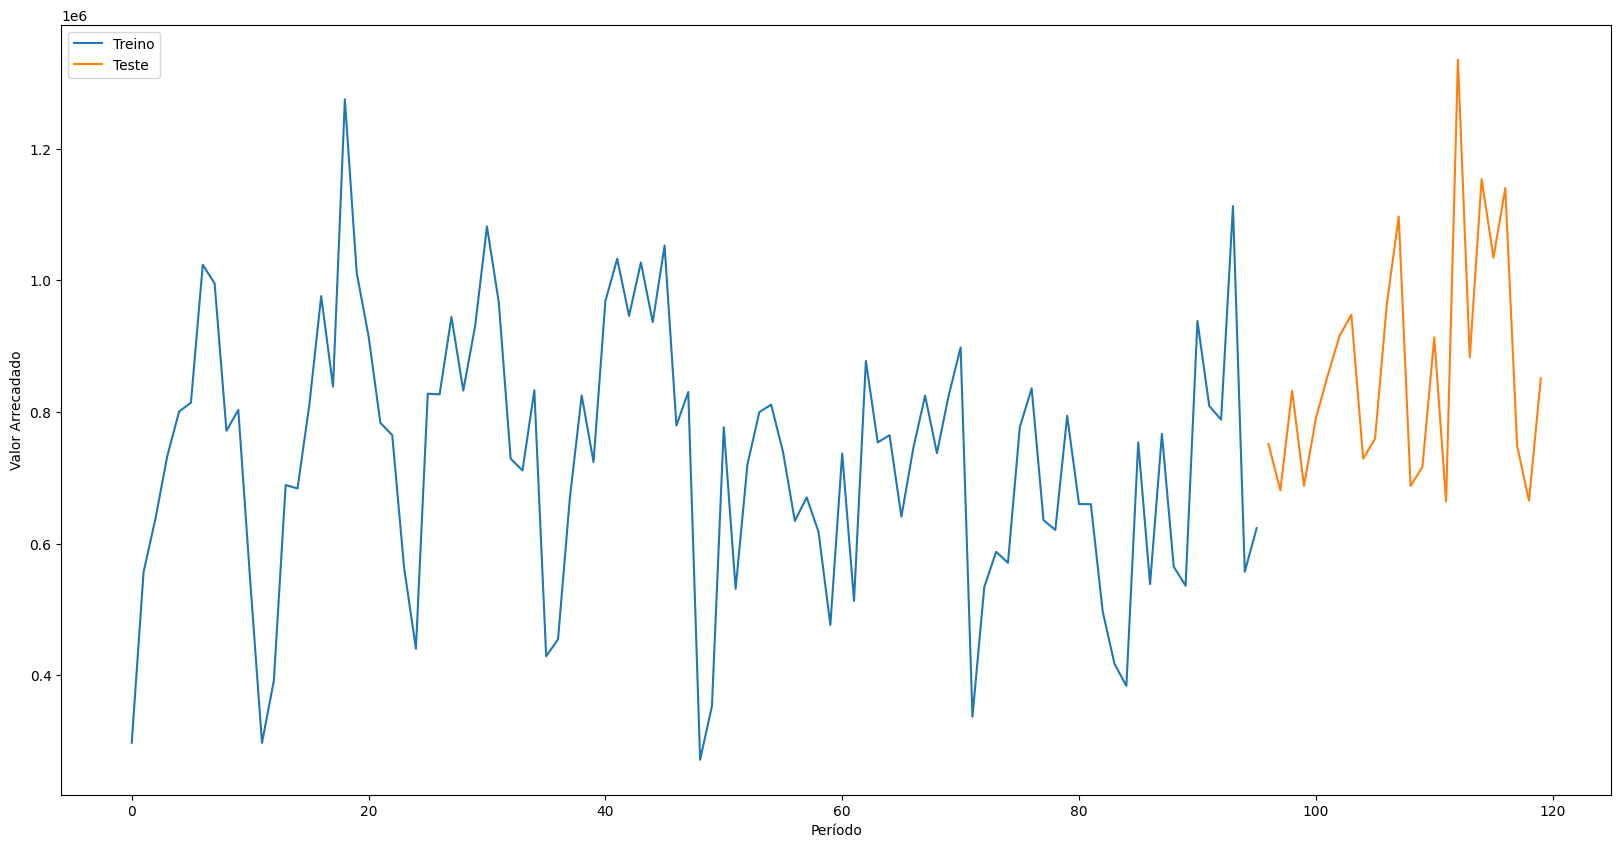

Dimension of train data:  (96, 23)
Dimension of test data:  (24, 23)


<Figure size 640x480 with 0 Axes>

In [48]:
plot_series_data(df_despesas_agrupado, 'valor_pago')

In [49]:
df_despesas_agrupado.to_csv('../../data/dados_despesas.csv', index=False, sep=';')

### Modelagem dos dados

In [50]:
train_size = int(len(df_despesas_agrupado) * 0.75)
train_dataset, test_dataset = df_despesas_agrupado.iloc[:train_size], df_despesas_agrupado.iloc[train_size:]

In [51]:
X_train = train_dataset.drop(['valor_pago'], axis=1)
y_train = train_dataset.loc[:, ['valor_pago']]

In [52]:
X_test = test_dataset.drop(['valor_pago'], axis=1)
y_test = test_dataset.loc[:, ['valor_pago']]

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

In [54]:
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

In [55]:
# normalizando os dados de treino e teste
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

In [56]:
X_test = test_x_norm.reshape((test_x_norm.shape[0], 1, test_x_norm.shape[1]))
X_train = train_x_norm.reshape((train_x_norm.shape[0], 1, train_x_norm.shape[1]))
y_test = test_y_norm.reshape((test_y_norm.shape[0], 1))
y_train = train_y_norm.reshape((train_y_norm.shape[0], 1))

Ajuste no modelo com 32, 64 e 128 neurônios para verficação do mais adequado para a aplicação.

Epoch 1/100
18/18 [==============================] - 6s 82ms/step - loss: 0.2301 - val_loss: 0.0677
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 0.1243 - val_loss: 0.0154
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0544 - val_loss: 0.0478
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0370 - val_loss: 0.0309
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0375 - val_loss: 0.0208
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0350 - val_loss: 0.0220
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0352 - val_loss: 0.0181
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0371 - val_loss: 0.0158
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0327 - val_loss: 0.0143
Epoch 10/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0325 - val_loss: 0.0132
Epoch 11

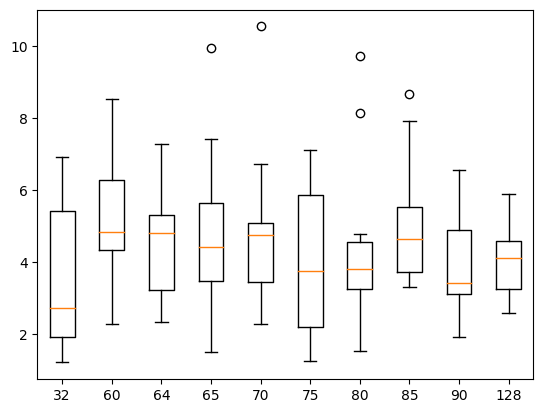

In [57]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, neurons):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = neurons))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=4)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = np.mean(scores[i]), np.std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}, Std={s:.3f}')
    # boxplot das pontuações
    plt.boxplot(scores, labels=params)
    plt.savefig('../../src/static/images/despesas/figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>Neurons={p}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [32, 60, 64, 65, 70, 75, 80, 85, 90, 128]
run_experiment(n_params)

Ajuste de modelo com tamanho do lote 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 e 12, para verificação do mais adequado para a aplicação.

Epoch 1/50
72/72 [==============================] - 8s 26ms/step - loss: 0.0790 - val_loss: 0.0154
Epoch 2/50
72/72 [==============================] - 1s 7ms/step - loss: 0.0366 - val_loss: 0.0139
Epoch 3/50
72/72 [==============================] - 0s 6ms/step - loss: 0.0289 - val_loss: 0.0143
Epoch 4/50
72/72 [==============================] - 1s 10ms/step - loss: 0.0230 - val_loss: 0.0196
Epoch 5/50
72/72 [==============================] - 1s 10ms/step - loss: 0.0194 - val_loss: 0.0208
Epoch 6/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0208 - val_loss: 0.0180
Epoch 7/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0201 - val_loss: 0.0229
Epoch 8/50
72/72 [==============================] - 1s 10ms/step - loss: 0.0162 - val_loss: 0.0136
Epoch 9/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0169 - val_loss: 0.0129
Epoch 10/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0171 - val_loss: 0.0140
Epoch 11/50

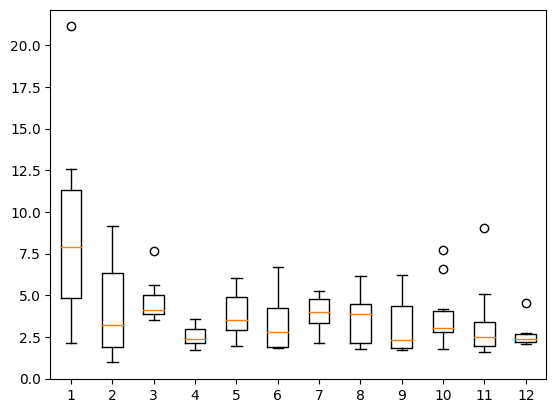

In [58]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, batch_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = 80))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=batch_size)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = np.mean(scores[i]), np.std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}, Std={s:.3f}')
    # boxplot das pontuações
    plt.boxplot(scores, labels=params)
    plt.savefig('../../src/static/images/despesas/figura[1].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>p={p}: {r+1}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = np.arange(1, 13)
run_experiment(n_params)

Ajuste no modelo com diluição - dropout - 0.05, 0.1, 0.2, 0.3, para verficação do mais adequado para a aplicação.

Epoch 1/50
15/15 [==============================] - 7s 91ms/step - loss: 0.1913 - val_loss: 0.0195
Epoch 2/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0567 - val_loss: 0.0588
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0348 - val_loss: 0.0220
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0352 - val_loss: 0.0199
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0316 - val_loss: 0.0186
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0307 - val_loss: 0.0152
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0272 - val_loss: 0.0142
Epoch 8/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0276 - val_loss: 0.0131
Epoch 9/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0270 - val_loss: 0.0129
Epoch 10/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0238 - val_loss: 0.0128
Epoch 11/50
1

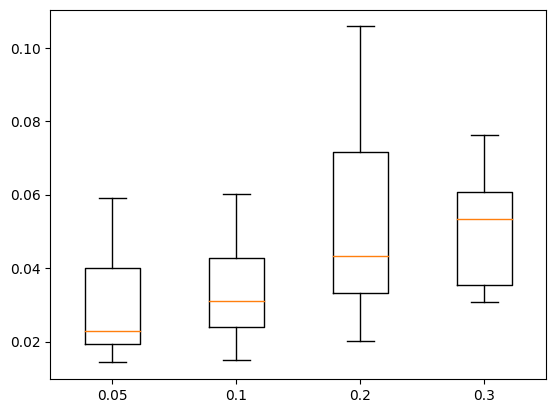

In [59]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, dropout):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.LSTM(units = 80))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=5)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = np.mean(scores[i]), np.std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    plt.boxplot(scores, labels=params)
    plt.savefig('../../src/static/images/despesas/figura[2].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score
            scores.append(score)
            print(f'>p={p}: {r+1}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [0.05, 0.1, 0.2, 0.3]
run_experiment(n_params)

Ajustando o modelo com os padrões mais adequados visualizados nos testes anteriores.
<p>Neurônios = 80</p>
<p>Tamanho do lote/batch = 4</p>
<p>Dopout = 0.2</p>

In [61]:
neurons = 80
batch_size = 4
dropout = 0.2

In [62]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.LSTM(units = neurons))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=150, batch_size=batch_size, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=5)
    return loss

# Resumindo as pontuações
def summarize_results(scores):
    print(scores)
    m, s = np.mean(scores), np.std(scores)
    print(f'Loss: Mean = {m:.3f}, Std = {s:.3f}')

# Rodando um experimento
def run_experiment(repeats = 10):
    # repetindo o experimento
    scores = list()
    for r in range(repeats):
        score = evaluate_model(X_train, y_train, X_test, y_test)
        score = score
        scores.append(score)
        print(f'>{r+1}: Score={score}')
    # resumindo os resultados
    summarize_results(scores)

# Rodando o experimento
run_experiment()

Epoch 1/150
18/18 [==============================] - 6s 81ms/step - loss: 0.1686 - val_loss: 0.0141
Epoch 2/150
18/18 [==============================] - 0s 9ms/step - loss: 0.0490 - val_loss: 0.0531
Epoch 3/150
18/18 [==============================] - 0s 9ms/step - loss: 0.0366 - val_loss: 0.0235
Epoch 4/150
18/18 [==============================] - 0s 10ms/step - loss: 0.0326 - val_loss: 0.0260
Epoch 5/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0316 - val_loss: 0.0163
Epoch 6/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0322 - val_loss: 0.0149
Epoch 7/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0277 - val_loss: 0.0150
Epoch 8/150
18/18 [==============================] - 0s 9ms/step - loss: 0.0242 - val_loss: 0.0120
Epoch 9/150
18/18 [==============================] - 0s 9ms/step - loss: 0.0264 - val_loss: 0.0116
Epoch 10/150
18/18 [==============================] - 0s 9ms/step - loss: 0.0231 - val_loss: 0.0115
Epoch 1

### Criando modelo

In [63]:
def create_model(units, dropout):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units=units, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.LSTM(units = units))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    return model

In [64]:
def fit_model(model, batch_size):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train, y_train, epochs=150, batch_size=batch_size, validation_split = 0.2, shuffle=False, callbacks=[early_stop])
    return history

In [65]:
model_lstm = create_model(neurons, dropout)
history_lstm = fit_model(model_lstm, batch_size)

Epoch 1/150
18/18 [==============================] - 5s 74ms/step - loss: 0.1663 - val_loss: 0.0149
Epoch 2/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0543 - val_loss: 0.0429
Epoch 3/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0369 - val_loss: 0.0202
Epoch 4/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0358 - val_loss: 0.0241
Epoch 5/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0293 - val_loss: 0.0158
Epoch 6/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0306 - val_loss: 0.0148
Epoch 7/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0274 - val_loss: 0.0127
Epoch 8/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0235 - val_loss: 0.0124
Epoch 9/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0212 - val_loss: 0.0122
Epoch 10/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0196 - val_loss: 0.0125
Epoch 11

### Salvando modelo:

In [66]:
model_lstm.save('despesas_2013_2022')

INFO:tensorflow:Assets written to: despesas_2013_2022\assets


INFO:tensorflow:Assets written to: despesas_2013_2022\assets


### Carga do modelo salvo:

In [67]:
model_lstm = tf.keras.models.load_model('despesas_2013_2022')

Pré-processamento e predição da base de testes com a utilização do modelo carregado:

In [68]:
def prediction(model):
    y_pred = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred)
    return y_pred

In [69]:
def plot_future(prediction, y_test):
    plt.figure(figsize=(10,6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='Dados reais')
    plt.plot(np.arange(range_future), np.array(prediction),label='Predição')
    plt.legend(loc='upper left')
    plt.xlabel('Período')
    plt.ylabel('Valor Arrecadado')
    plt.title('Predição de Receitas - LSTM')
    plt.savefig('../../src/static/images/despesas/figura[3].png')
    plt.show()

In [70]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

prediction_lstm = prediction(model_lstm)

1/1 [==============================] - 1s 1s/step


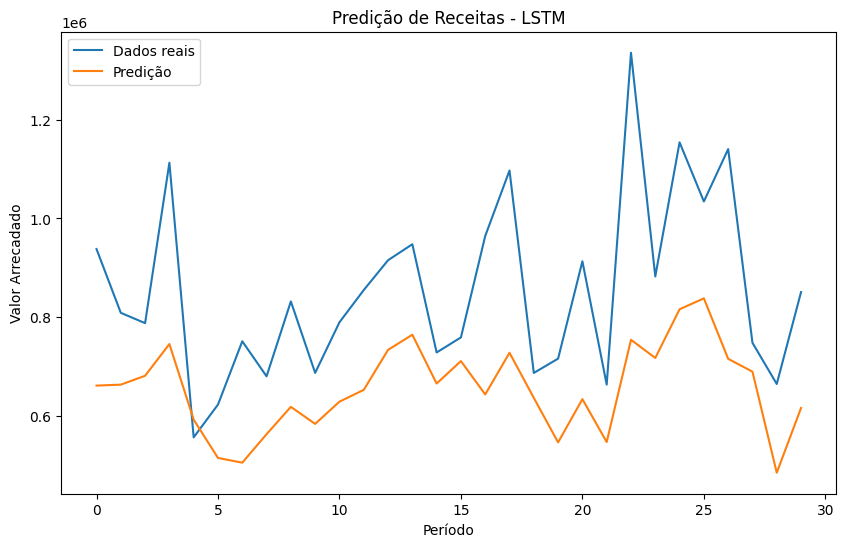

In [71]:
plot_future(prediction_lstm, y_test)

Cálculo do erro médio absoluto e raiz quadrática média:

In [72]:
def evaluate_prediction(prediction_lstm, actual, model_name):
    errors = prediction_lstm - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(f'{model_name}:')
    print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}')

In [73]:
evaluate_prediction(prediction_lstm, y_test, 'LSTM')

LSTM:
MSE: 55817135773.11, RMSE: 236256.50, MAE: 201198.50


Pré-processamento dos dados e aplicação do modelo em toda a base de dados (treino + teste):

In [74]:
def prediction(model):
    y_pred = model.predict(X)
    y_pred = scaler_y.inverse_transform(y_pred)
    return y_pred

In [75]:
def plot_future(prediction, y):
    plt.figure(figsize=(10,6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y), label='Dados reais')
    plt.plot(np.arange(range_future), np.array(prediction),label='Predição')
    plt.legend(loc='upper left')
    plt.xlabel('Período')
    plt.ylabel('Valor Arrecadado')
    plt.title('Predição de Receitas - LSTM')
    plt.savefig('../../src/static/images/despesas/figura[4].png')
    plt.show()

4/4 [==============================] - 0s 5ms/step


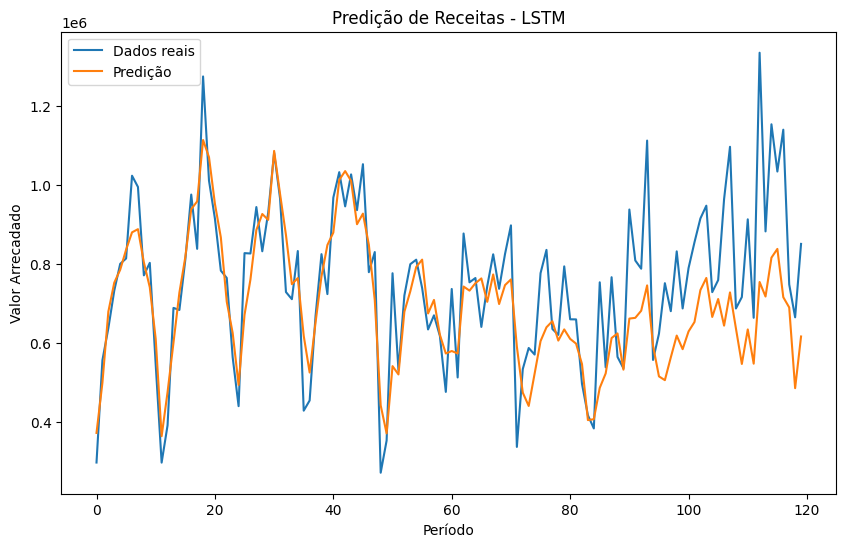

In [76]:
X = df_despesas_agrupado.drop(['valor_pago'], axis=1)
y = df_despesas_agrupado.loc[:, ['valor_pago']]

y_norm = output_scaler.transform(y)
X_norm = input_scaler.transform(X)

X = X_norm.reshape((X_norm.shape[0], 1, X_norm.shape[1]))
y = y_norm.reshape((y_norm.shape[0], 1))

y = scaler_y.inverse_transform(y)

prediction_lstm = prediction(model_lstm)

plot_future(prediction_lstm, y)

Cálculo do erro médio percentual:

In [77]:
real = y.flatten()
previsto = prediction_lstm.flatten()

tabela = pd.DataFrame([real, previsto]).T
tabela = tabela.rename(columns={0: 'Real', 1: 'Previsto'})
tabela['Diferenca'] = 1 - (tabela['Real'] / tabela['Previsto'])
media_tabela = tabela['Diferenca'].mean() * 100
print(f'Erro médio percentual: {media_tabela:.2f}%')

Erro médio percentual: -8.95%


Distribuição de erros:

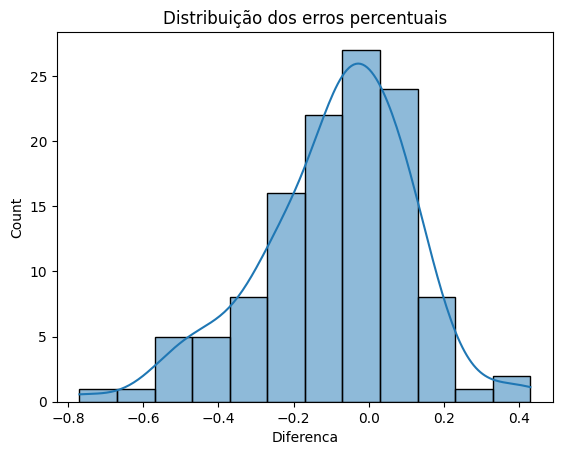

In [78]:
import seaborn as sns

sns.histplot(data=tabela, x='Diferenca', kde=True).set_title('Distribuição dos erros percentuais').get_figure().savefig('../../src/static/images/despesas/figura[5].png')

Relizando previsões com os dados e modelo treinado

In [79]:
previsao = df_despesas_agrupado

previsao.columns

Index(['valor_pago', 'populacao', 'variacao_anual',
       'aceleracao_variacao_anual', 'ideb_5ano', 'ideb_9ano', 'idhm',
       'pct_desp_recp_saude_mun', 'desp_tot_saude_pc_mun',
       'desp_recp_saude_pc_mun', 'desp_tot_saude_pc_mun_def',
       'desp_recp_saude_pc_mun_def', 'SMA(12)_pago', 'SMA(6)_pago',
       'SMA(3)_pago', 'SMA(2)_pago', 'lag(12)_pago', 'lag(6)_pago',
       'lag(4)_pago', 'lag(3)_pago', 'lag(2)_pago', 'lag(1)_pago',
       'ano_mes_ordinal'],
      dtype='object')

In [80]:
periodo = 8  # escolha o período de previsão à frente será executado

for i in range(periodo):
    # Crie uma nova linha de dados vazia
    row = pd.DataFrame(columns=previsao.columns)

    # Calcule as médias e valores de atraso
    row.loc[0, 'SMA(12)'] = previsao['valor_pago'].iloc[-12:].mean()
    row.loc[0, 'SMA(6)'] = previsao['valor_pago'].iloc[-6:].mean()
    row.loc[0, 'SMA(3)'] = previsao['valor_pago'].iloc[-3:].mean()
    row.loc[0, 'SMA(2)'] = previsao['valor_pago'].iloc[-2:].mean()
    row.loc[0, 'lag(12)'] = previsao['valor_pago'].iloc[-12]
    row.loc[0, 'lag(6)'] = previsao['valor_pago'].iloc[-6]
    row.loc[0, 'lag(4)'] = previsao['valor_pago'].iloc[-4]
    row.loc[0, 'lag(3)'] = previsao['valor_pago'].iloc[-3]
    row.loc[0, 'lag(2)'] = previsao['valor_pago'].iloc[-2]
    row.loc[0, 'lag(1)'] = previsao['valor_pago'].iloc[-1]
    row.loc[0, 'populacao'] = previsao['populacao'].iloc[-1]
    row.loc[0, 'variacao_anual'] = previsao['variacao_anual'].iloc[-1]
    row.loc[0, 'aceleracao_variacao_anual'] = previsao['aceleracao_variacao_anual'].iloc[-1]
    row.loc[0, 'ideb_5ano'] = previsao['ideb_5ano'].iloc[-1]
    row.loc[0, 'ideb_9ano'] = previsao['ideb_9ano'].iloc[-1]
    row.loc[0, 'idhm'] = previsao['idhm'].iloc[-1]
    row.loc[0, 'pct_desp_recp_saude_mun'] = previsao['pct_desp_recp_saude_mun'].iloc[-1]
    row.loc[0, 'desp_tot_saude_pc_mun'] = previsao['desp_tot_saude_pc_mun'].iloc[-1]
    row.loc[0, 'desp_recp_saude_pc_mun'] = previsao['desp_recp_saude_pc_mun'].iloc[-1]
    row.loc[0, 'desp_tot_saude_pc_mun_def'] = previsao['desp_tot_saude_pc_mun_def'].iloc[-1]
    row.loc[0, 'desp_recp_saude_pc_mun_def'] = previsao['desp_recp_saude_pc_mun_def'].iloc[-1]

    # Incremente a data
    row.loc[0, 'ano_mes_ordinal'] = previsao['ano_mes_ordinal'].iloc[-1]+1
    
    # Excluindo a coluna de valor arrecadado
    row = row.drop(columns={'valor_pago'})
    
    # Transforme a linha em um array e normalize
    row = np.array(row.iloc[-1]).reshape(1, -1)
    row_norm = input_scaler.transform(row)

    # Preveja usando o modelo LSTM
    to_prev = row_norm.reshape((row_norm.shape[0], 1, row_norm.shape[1]))
    prev = model_lstm.predict(to_prev)
    prev = scaler_y.inverse_transform(prev)

    # Crie um DataFrame com a previsão e adicione ao DataFrame principal
    row_ = pd.DataFrame(row, columns = ['populacao', 'variacao_anual',
       'aceleracao_variacao_anual', 'ideb_5ano', 'ideb_9ano', 'idhm',
       'pct_desp_recp_saude_mun', 'desp_tot_saude_pc_mun',
       'desp_recp_saude_pc_mun', 'desp_tot_saude_pc_mun_def',
       'desp_recp_saude_pc_mun_def', 'SMA(12)_pago', 'SMA(6)_pago',
       'SMA(3)_pago', 'SMA(2)_pago', 'lag(12)_pago', 'lag(6)_pago',
       'lag(4)_pago', 'lag(3)_pago', 'lag(2)_pago', 'lag(1)_pago',
       'ano_mes_ordinal'])
    row_.loc[0, 'valor_pago'] = prev[0]
    previsao = pd.concat([previsao, row_], ignore_index=True)

previsao

c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 32 features, but MinMaxScaler is expecting 22 features as input.